In [85]:
import sys; sys.path.append('..')
from omegaconf import OmegaConf
from PIL import Image
import os
import matplotlib.pyplot as plt
from model_jittor.autoencoder.vqgan import *
import albumentations as A
from utils import ToVar, convert_to_negetive_one_positive_one, to_onehot
import numpy as np
import torch

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
config = OmegaConf.load('../configs/ldm_wang.yaml')
model = VQModelInference(
    **config.model.first_stage_config, 
)

Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
Loaded VQModel's ckeckpoint from '../ckpts/vq_jittor.pkl'


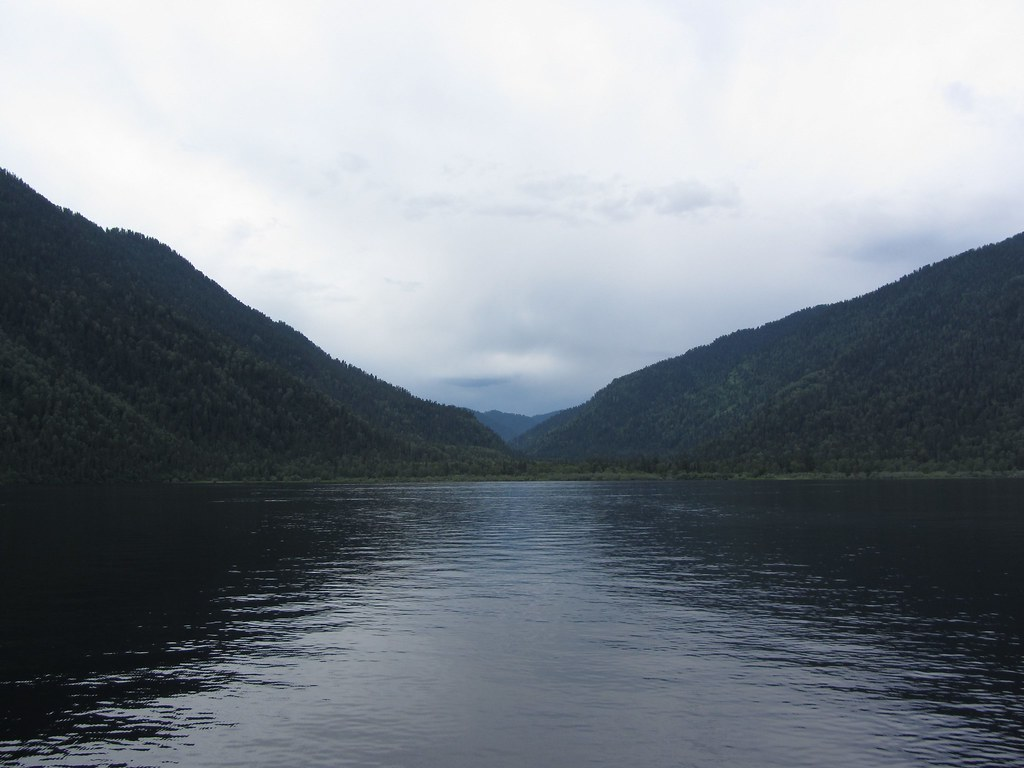

In [87]:
PATN = '/nas/landscape/train_val/images'
img = Image.open(os.path.join(PATN, '5860083897_d3c535fd1d_b.jpg'))
img

In [88]:
transform = A.Compose([
    A.Resize(height=384, width=512),
    A.Lambda(image=convert_to_negetive_one_positive_one),
    ToVar(),
])
img_t = transform(image=np.asarray(img))['image'][None, Ellipsis]
print(img_t.shape)

[1,3,384,512,]


In [89]:
img_rec = model(img_t, True)
img_rec

jt.Var([[[[ 0.8258503   0.8651126   0.87810075 ...  0.91209143  0.8614371
     0.83086777]
   [ 0.8932274   0.8431812   0.8569228  ...  0.8929744   0.9267619
     0.9020659 ]
   [ 0.8815423   0.86306894  0.87244946 ...  0.93710077  0.9514216
     0.93490237]
   ...
   [-0.2963407  -0.4094243  -0.6115193  ... -0.49392986 -0.5267489
    -0.6012468 ]
   [-0.26429543 -0.48615292 -0.6551665  ... -0.5460236  -0.62350184
    -0.6339669 ]
   [-0.54879004 -0.39880618 -0.5379117  ... -0.39097822 -0.41794732
    -0.37919018]]

  [[ 0.8629841   0.9180656   0.9281527  ...  0.94354737  0.92890596
     0.8902973 ]
   [ 0.85195637  0.9158857   0.90966004 ...  0.93027     0.92554253
     0.9239977 ]
   [ 0.85764146  0.91921335  0.9088458  ...  0.9208891   0.91535234
     0.9208136 ]
   ...
   [-0.2820669  -0.35021687 -0.5220919  ... -0.4339505  -0.4501793
    -0.4981657 ]
   [-0.22175209 -0.42638347 -0.6111597  ... -0.46858597 -0.5600504
    -0.5366495 ]
   [-0.47780883 -0.41470647 -0.55812323 ... -0.2

In [90]:
image = (img_rec.data[0] + 1) / 2
image = np.clip(image, 0, 1)
print(image.shape)

(3, 384, 512)


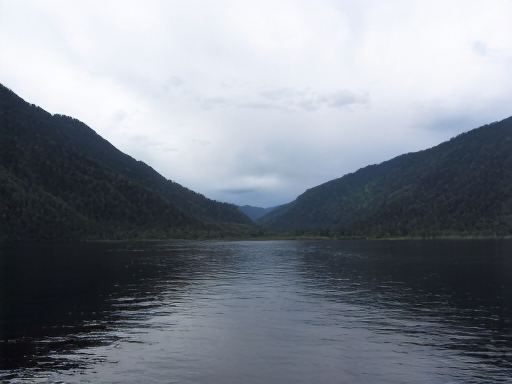

In [92]:
from torchvision.transforms import ToPILImage
import torch
ToPILImage()(torch.tensor(image))